In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 25
X = np.reshape(np.linspace(0, 0.9, N), (N,1))
Y = np.cos(10*X**2) + 0.1* np.sin(100*X)


In [3]:
def getPhi(feature, order):
    phi = np.zeros((feature.shape[0], order + 1))
    for i in range(feature.shape[0]):
        for j in range(0, order + 1):
            phi[i][j] = np.power(feature[i], j)
    return phi

In [4]:
def lml(alpha, beta, Phi, Y):
    conv = alpha* np.dot(Phi, np.transpose(Phi)) + beta * np.identity(Phi.shape[0])
    t1 = (2 * np.pi)**(-Phi.shape[0]/2.0)* np.linalg.det(conv) **(-0.5)
    t2 = np.exp((-0.5)*(np.dot(np.dot(np.transpose(Y), np.linalg.inv(conv)), Y)))
    log_ml = np.log(t1 * t2)
    return log_ml[0][0]


In [5]:
def grad_lml(alpha, beta, Phi, Y):
    conv = alpha * np.dot(Phi, np.transpose(Phi)) + beta * np.identity(Phi.shape[0])

    t1 = -0.5 * np.trace(np.dot(np.linalg.inv(conv), np.dot(Phi, np.transpose(Phi))))
    t2 = -np.dot(np.dot(np.linalg.inv(conv), np.dot(Phi, np.transpose(Phi))), np.linalg.inv(conv))
    t3 = -0.5 * np.dot(np.dot(np.transpose(Y), t2), Y)
    lml_alpha = t1 +t3
    t4 = -0.5 * np.trace(np.linalg.inv(conv))
    t5 = -np.dot(np.linalg.inv(conv), np.linalg.inv(conv))
    t6 = -0.5 * np.dot(np.dot(np.transpose(Y), t5), Y)
    lml_beta = t4 + t6
    return np.array([lml_alpha, lml_beta])


In [6]:
def lml_gradient_descent(start_point, Phi, Y, iteration, step_size):
    alpha_array = np.zeros((iteration,))
    beta_array = np.zeros((iteration,))
    for i in range(0, iteration):
        alpha_array[i] = start_point[0][0]
        beta_array[i] = start_point[1][0]
        start_point = start_point + step_size * grad_lml(start_point[0][0], start_point[1][0], Phi, Y)
    return alpha_array, beta_array

In [7]:
Phi = getPhi(X, 1)
iteration = 200
step_size = 0.01
start_point = np.array([[0.5], [0.5]])


In [8]:
alpha_array, beta_array  = lml_gradient_descent(start_point, Phi, Y, iteration, step_size)
print(alpha_array[iteration-1])

0.42779213037952624


In [9]:
def plot_contour(delta, xrange1, xrange2, yrange1, yrange2):
    x_axis = np.arange(xrange1, xrange2, delta)
    y_axis = np.arange(yrange1, yrange2, delta)
    X_points, Y_points = np.meshgrid(x_axis, y_axis)
    Z = np.zeros(X_points.shape)
    print(Z.shape)
    for x1 in range(0, Z.shape[1]):
        for y1 in range(0, Z.shape[0]):
            z = lml(x_axis[x1], y_axis[y1], Phi, Y)
            Z[y1][x1] = z
    return X_points, Y_points, Z

(13, 13)
(0.42779213037952624, 0.4490879439430317)
-27.608803207736322


Text(0.5,1,u'Contour Plot and Steps for log marginal likelihood,Step size=0.01')

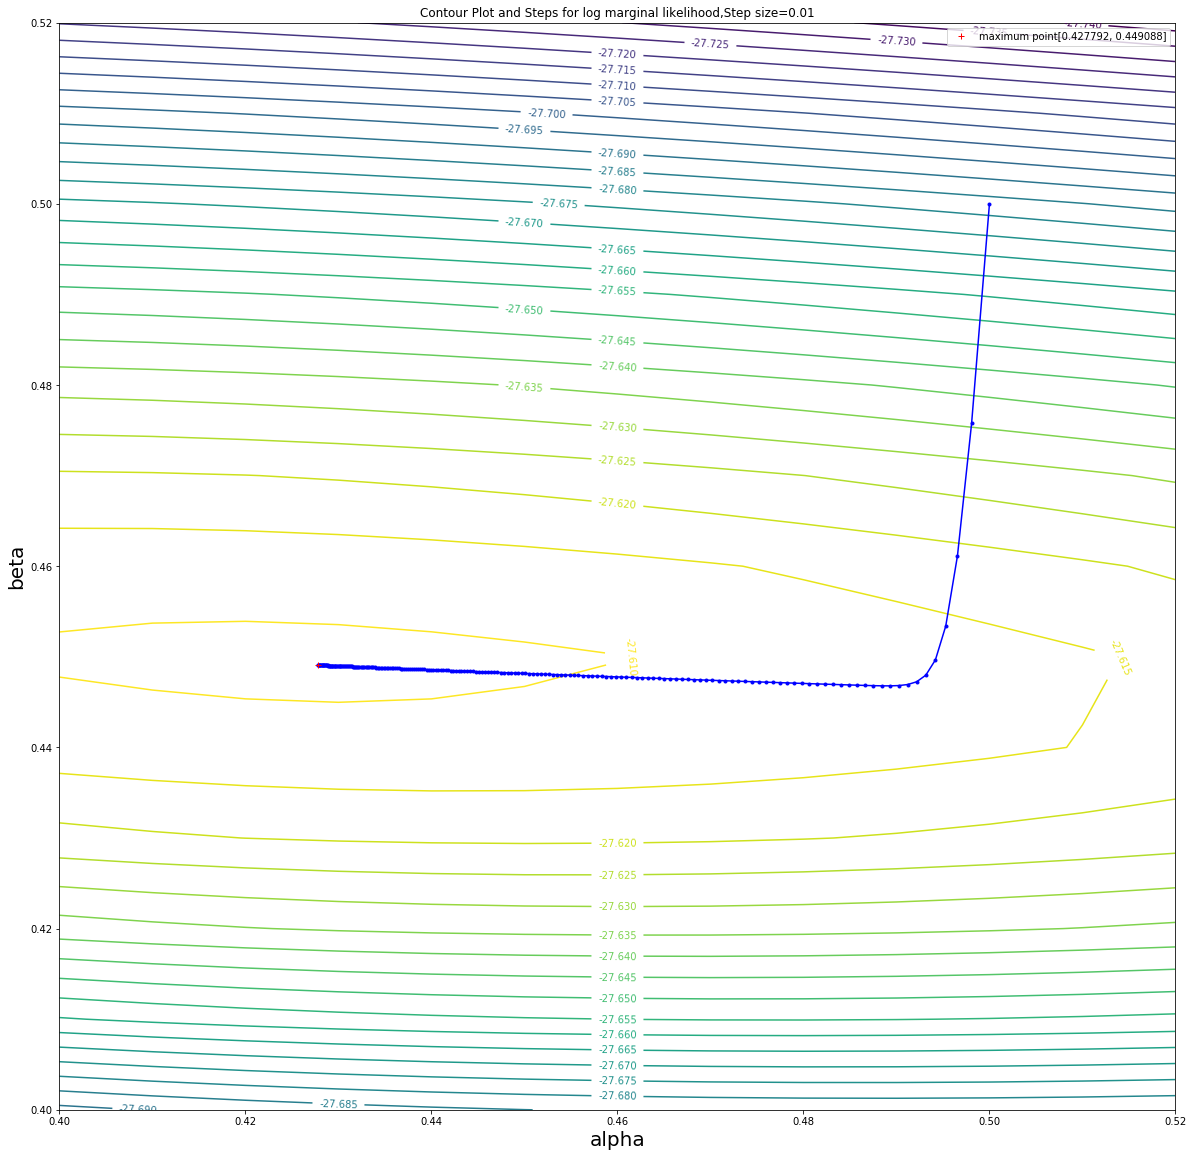

In [10]:
fig = plt.figure(1, figsize=(20,20))
X_points, Y_points, Z = plot_contour(0.01, 0.4, 0.525, 0.4, 0.525)
CS = plt.contour(X_points, Y_points, Z, 30)

plt.clabel(CS, inline=True, fontsize=10)
plt.xlabel('alpha', fontsize=20)
plt.ylabel('beta', fontsize=20)
x_points, y_points = lml_gradient_descent(start_point, Phi, Y, iteration, step_size)
# plt.scatter(x_points, y_points)
print(x_points[199], y_points[199])
print(lml(x_points[199], y_points[199], Phi, Y))
plt.plot(x_points, y_points, '.b-')
plt.plot(x_points[iteration-1], y_points[iteration-1], '+r', label = 'maximum point[0.427792, 0.449088]')
plt.legend()
plt.title('Contour Plot and Steps for log marginal likelihood,Step size=0.01')

In [40]:
def getPhi2(feature, order):
    phi = np.ones((feature.shape[0], 2*order+1))
    for i in range(feature.shape[0]):
        for j in range(1, order+1):
            a = 2 * np.pi * j * feature[i]
            phi[i][2*j -1] = np.sin(a)
            phi[i][2*j] = np.cos(a)
    return phi


In [41]:
value = np.zeros((1, 12))
iteration = 1000
step_size = 0.001
start_point = np.array([[0.5], [0.5]])
for order in range(12):
    Phi = getPhi2(X, order)
    alpha_array, beta_array  = lml_gradient_descent(start_point, Phi, Y, iteration, step_size)
    value[0][order] = lml(alpha_array[iteration-1], beta_array[iteration-1], Phi, Y)
print(value)

[[-27.80190178 -18.2780087  -14.15597575 -18.96722518 -43.65667302
  -61.25476535 -46.24754596 -56.50386056 -45.95502878 -72.67792156
  -76.58554027 -90.27557579]]


Text(0,0.5,u'log marginal likelihood value')

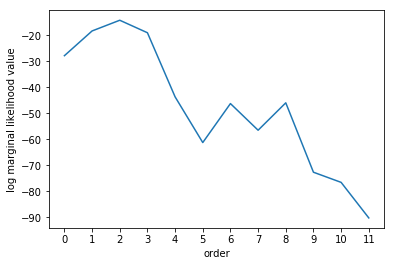

In [42]:
order = np.arange(0,12)
plt.plot(order, value[0])
plt.xticks(order)
plt.xlabel('order')
plt.ylabel('log marginal likelihood value')

In [23]:
def getPhi3(feature, num, scale, means):
    phi = np.ones((feature.shape[0], num+1))
    for i in range(feature.shape[0]):
        for j in range(1, num+1):
            phi[i][j] = np.exp(-np.power(feature[i]-means[j-1], 2)/(2*scale*scale))
    return phi

In [24]:
means = np.linspace(-0.5, 1.0 ,num=10)
Phi = getPhi3(X, 10, 0.1, means)
alpha = 1 
beta = 0.1


In [25]:
S_n = np.linalg.inv(alpha**(-1)*np.identity(len(np.dot(Phi.T,Phi))) + beta**(-1) * np.dot(np.transpose(Phi), Phi))
m_n = np.dot(S_n,(beta**(-1) * np.dot(np.transpose(Phi), Y))).reshape(11,)
print(m_n)

[ 7.99012749e-02  1.84103890e-06  1.81856516e-03  1.18445451e-01
  6.94782449e-01  5.57912426e-01  5.07805011e-01 -9.84263978e-01
 -3.22011575e-01  1.14529948e+00 -1.52275945e+00]


In [26]:
ran1 = np.random.multivariate_normal(m_n,S_n)
ran2 = np.random.multivariate_normal(m_n,S_n)
ran3 = np.random.multivariate_normal(m_n,S_n)
ran4 = np.random.multivariate_normal(m_n,S_n)
ran5 = np.random.multivariate_normal(m_n,S_n)
x_test = np.linspace(-1,1.5,100)
phi_test = getPhi3(x_test,10,0.1,np.linspace(-0.5,1,10))



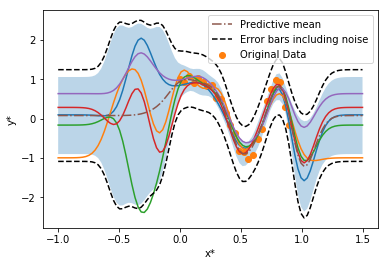

In [35]:
ytest_1 = np.dot(phi_test,ran1)
ytest_2 = np.dot(phi_test,ran2)
ytest_3 = np.dot(phi_test,ran3)
ytest_4 = np.dot(phi_test,ran4)
ytest_5 = np.dot(phi_test,ran5)

plt.plot(x_test,ytest_1)
plt.plot(x_test,ytest_2)
plt.plot(x_test,ytest_3)
plt.plot(x_test,ytest_4)
plt.plot(x_test,ytest_5)
predictive_mean = np.dot(phi_test,m_n)
var1 = np.dot(phi_test,S_n)
var = np.dot(var1,np.transpose(phi_test))

stand1 = predictive_mean+2*np.sqrt(np.diagonal(var))
stand2 = predictive_mean-2*np.sqrt(np.diagonal(var))
plt.plot(x_test,predictive_mean,'-.',label='Predictive mean')
plt.fill_between(x_test,stand1,stand2,alpha=0.3)
noisestand1 = predictive_mean+2*np.sqrt(np.diagonal(var)+beta)
noisestand2 = predictive_mean-2*np.sqrt(np.diagonal(var)+beta)
plt.plot(x_test,noisestand1,'--k',label='Error bars including noise')
plt.plot(x_test,noisestand2,'--k')
plt.xlabel('x*')
plt.ylabel('y*')
plt.scatter(X,Y,label='Original Data')
plt.legend()
plt.show()
